In [1]:
class Perceptron:
    def __init__(self, input=8, lr = 0.1, num_iters=100000):
        self.input = input
        self.wts = np.random.rand(input + 1)
        self.num_iters = num_iters
        self.lr = lr
        self.error = []
    
    def Sigmoid(self, x): 
        return 1/(1+np.exp(-x))
    
    def grad(self, grad_A, z):
        out= self.Sigmoid(z)
        return grad_A*out*(1-out)
    
    def train(self, X, y):
       
        
        xxxxx = np.ones(shape= (X.shape[0], 1))
        X = np.concatenate([X, xxxxx], axis = 1)
        
        for i in range(self.num_iters): 
            s_i  = random.randint(0, len(X)-1)
            s_x = X[s_i]
            s_y = y[s_i]
            z = np.dot(s_x, self.wts)
            a = self.Sigmoid(z)
            dA = -((s_y/a) - ((1-s_y)/(1-a)))

            dZ = self.grad(dA, z)
            dW = dZ*s_x
            self.wts -= self.lr*dW
            
            
            prre = self.test(X)
            prre_ = (prre > 0.5).astype(np.int)
            loss = -(y*np.log(prre) + (1-y)*np.log(1-prre))
            
            
            self.error.append(np.mean(loss))
            
    
    def test(self, X, from_train = True):
        if from_train==False:
            xxxxx = np.ones(shape= (X.shape[0], 1))
            X = np.concatenate([X, xxxxx], axis = 1)
        y = self.Sigmoid(np.matmul(X, self.wts))
        return y

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/Group03.zip

Archive:  /content/drive/MyDrive/Group03.zip
   creating: Group03/
   creating: Group03/Classification/
   creating: Group03/Classification/Image_Group03/
   creating: Group03/Classification/Image_Group03/test/
   creating: Group03/Classification/Image_Group03/test/botanical_garden/
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_aaestfykdspfjxqz.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_aajgmzsvuhejexcq.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_aaqfmkvdwukffrst.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_acbeefkxpymwevpk.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_acghfkorvlqvksjz.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_ackdwnmnaehpqggg.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_ackzydggopidfvhd.jpg  
  inflating: Group03/Cl

In [6]:
NL_data = pd.read_csv('/content/Group03/Classification/NLS_Group03.txt', sep=" ", header=None)[1:]
c1 = NL_data.iloc[:,0:2].astype(np.float)

class1,class2,class3 = c1[0:300],c1[300:800],c1[800:1800]
train1,train2,train3=class1[0:180],class2[0:300],class3[0:600]
valid1,valid2,valid3  = class1[180:240],class2[300:400],class3[600:800]
test1,test2,test3 = class1[240:300],class2[400:500],class3[800:1000] 



In [32]:
set1_y = np.zeros(shape = 180)
set2_y = np.ones(shape = 300) 
X1=np.concatenate([train1,train2])
y1=np.concatenate([set1_y,set2_y]) 
# plt.scatter(train1.iloc[:, 0], train1.iloc[:, 1],label='class1')
# plt.scatter(train2.iloc[:, 0], train2.iloc[:, 1],label='class2')
# plt.scatter(train3.iloc[:, 0], train3.iloc[:, 1],label='class3')
# plt.title("Original Data")
# plt.legend()
# plt.show() 

X2=np.concatenate([train2,train3])
set11_y = np.zeros(shape = 300)
set22_y = np.ones(shape = 600)
y2=np.concatenate([set11_y,set22_y]) 


X3=np.concatenate([train3,train1])
y3=np.concatenate([np.zeros(shape = len(train3)),np.ones(shape = len(train1))]) 

model11 = Perceptron(2,0.1,1000)
model11.train(X1, y1)

model22 = Perceptron(2,0.1,1000)
model22.train(X2, y2)

model33 = Perceptron(2,0.1,1000)
model33.train(X3, y3)

In [16]:
def findclass(x1,x2): 
  one=0
  two=0
  three=0
  # test = [test3.iloc[0][0],test3.iloc[0][1]]
  tes = np.array([x1,x2])
  tes = tes.reshape(1,2)
  # print
  val = model11.test(tes,from_train=False)
  # print(val)
  one+=(1-val[0])
  two+=val[0]
  val = model22.test(tes,from_train=False)
  two+=(1-val[0])
  three+=val[0]
  val = model33.test(tes,from_train=False)
  three+=(1-val[0])
  one+=val[0]
  if(max(one,two,three)==one):return 1;
  if(max(one,two,three)==two):return 2;
  if(max(one,two,three)==three):return 3;


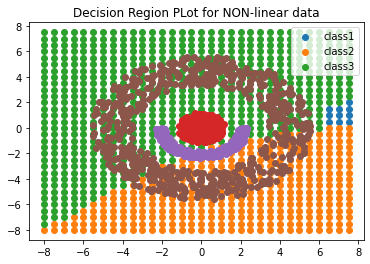

Confusion Matrix
0 0 60
0 45 55
0 72 128
Accuracy: 0.48


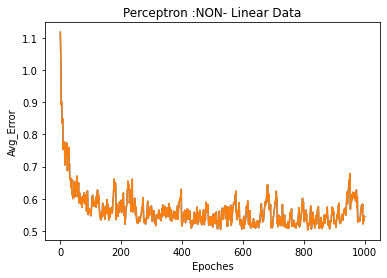

In [34]:
x1grid = np.arange(-8, 8, 0.5)
x2grid = np.arange(-8, 8, 0.5)

# x1grid
cl1 =[]
cl2=[]
cl3=[]

for i in range(len(x1grid)):
  for j in range(len(x2grid)):
    cl = findclass(x1grid[i],x2grid[j])
    if (cl==1):cl1.append([x1grid[i],x2grid[j]])
    if (cl==2):cl2.append([x1grid[i],x2grid[j]])
    if (cl==3):cl3.append([x1grid[i],x2grid[j]]) 




cl1= pd.DataFrame(cl1)
cl2= pd.DataFrame(cl2)
cl3= pd.DataFrame(cl3)
plt.scatter(cl1.iloc[:, 0], cl1.iloc[:, 1],label='class1',alpha=1)
plt.scatter(cl2.iloc[:, 0], cl2.iloc[:, 1],label='class2',alpha=1)
plt.scatter(cl3.iloc[:, 0], cl3.iloc[:, 1],label='class3',alpha=1)
plt.scatter(train1.iloc[:, 0], train1.iloc[:, 1])
plt.scatter(train2.iloc[:, 0], train2.iloc[:, 1])
plt.scatter(train3.iloc[:, 0], train3.iloc[:, 1])
plt.title("Decision Region PLot for NON-linear data")

plt.legend()
plt.show() 


error1 = model11.error
error2 = model22.error
error3= model33.error
epoch = [i for i in range(1,len(error1)+1)]
total_error = [(error1[i]+error2[i]+error3[i])/3 for i in range(len(error1))]
plt.plot(epoch,total_error)
x1grid = np.arange(-5, 25, 0.5)
x2grid = np.arange(-20, 15, 0.5)



error1 = model11.error
error2 = model22.error
error3= model33.error
epoch = [i for i in range(1,len(error1)+1)]
total_error = [(error1[i]+error2[i]+error3[i])/3 for i in range(len(error1))]
plt.plot(epoch,total_error)

plt.xlabel("Epoches")
plt.ylabel("Avg_Error")
plt.title("Perceptron :NON- Linear Data") 



predict1=[]
predict2=[]
predict3=[]

for i in range(len(test1)):
  c=findclass(test1.iloc[i][0],test1.iloc[i][1])
  predict1.append(c)

for i in range(len(test2)):
  c=findclass(test2.iloc[i][0],test2.iloc[i][1])
  predict2.append(c)

for i in range(len(test3)):
  c=findclass(test3.iloc[i][0],test3.iloc[i][1])
  predict3.append(c)
cm = [[predict1.count(1),predict1.count(2),predict1.count(3)],
      [predict2.count(1),predict2.count(2),predict2.count(3)],
      [predict3.count(1),predict3.count(2),predict3.count(3)]]

print("Confusion Matrix")
for i in range(3):
  print(*cm[i])


inAccuracy = (cm[0][1]+cm[0][2]+cm[1][2]+cm[1][0]+cm[2][0]+cm[2][1])/(cm[0][1]+cm[0][2]+cm[1][2]+cm[1][0]+cm[2][0]+cm[2][1]+cm[0][0]+cm[1][1]+cm[2][2])
print("Accuracy:",round(1-inAccuracy,2)) 

# import seaborn as sns
# # plt.title("ACCURACY = ", round(1-inAccuracy,4)*100,+"%")
# # plt.xlabel("Predicted class")
# # plt.ylabel("Actual class")

# ax = sns.heatmap(cm, annot=True)

# ax.set(xlabel="Predicted class", ylabel = "Actual class")

# plt.show()











[Text(33.0, 0.5, 'Actual class'), Text(0.5, 15.0, 'Predicted class')]

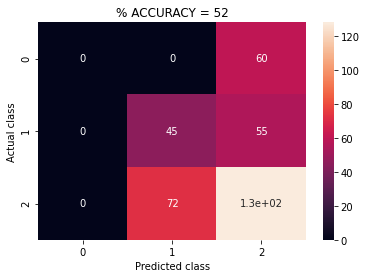

In [36]:

import seaborn as sns
plt.title("% ACCURACY = 52")
# plt.xlabel("Predicted class")
# plt.ylabel("Actual class")

ax = sns.heatmap(cm, annot=True)

ax.set(xlabel="Predicted class", ylabel = "Actual class")


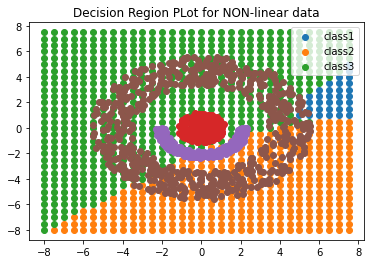

Confusion Matrix
0 0 60
0 45 55
3 76 121
Accuracy: 0.46111111111111114


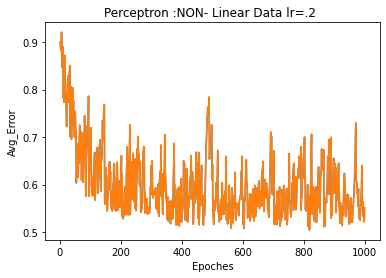

In [28]:

model11 = Perceptron(2,0.2,1000)
model11.train(X1, y1)

model22 = Perceptron(2,0.2,1000)
model22.train(X2, y2)

model33 = Perceptron(2,0.01,1000)
model33.train(X3, y3)


x1grid = np.arange(-8, 8, 0.5)
x2grid = np.arange(-8, 8, 0.5)

# x1grid
cl1 =[]
cl2=[]
cl3=[]

for i in range(len(x1grid)):
  for j in range(len(x2grid)):
    cl = findclass(x1grid[i],x2grid[j])
    if (cl==1):cl1.append([x1grid[i],x2grid[j]])
    if (cl==2):cl2.append([x1grid[i],x2grid[j]])
    if (cl==3):cl3.append([x1grid[i],x2grid[j]]) 




cl1= pd.DataFrame(cl1)
cl2= pd.DataFrame(cl2)
cl3= pd.DataFrame(cl3)
plt.scatter(cl1.iloc[:, 0], cl1.iloc[:, 1],label='class1',alpha=1)
plt.scatter(cl2.iloc[:, 0], cl2.iloc[:, 1],label='class2',alpha=1)
plt.scatter(cl3.iloc[:, 0], cl3.iloc[:, 1],label='class3',alpha=1)
plt.scatter(train1.iloc[:, 0], train1.iloc[:, 1])
plt.scatter(train2.iloc[:, 0], train2.iloc[:, 1])
plt.scatter(train3.iloc[:, 0], train3.iloc[:, 1])
plt.title("Decision Region PLot for NON-linear data")

plt.legend()
plt.show() 


error1 = model11.error
error2 = model22.error
error3= model33.error
epoch = [i for i in range(1,len(error1)+1)]
total_error = [(error1[i]+error2[i]+error3[i])/3 for i in range(len(error1))]
plt.plot(epoch,total_error)
x1grid = np.arange(-5, 25, 0.5)
x2grid = np.arange(-20, 15, 0.5)



error1 = model11.error
error2 = model22.error
error3= model33.error
epoch = [i for i in range(1,len(error1)+1)]
total_error = [(error1[i]+error2[i]+error3[i])/3 for i in range(len(error1))]
plt.plot(epoch,total_error)

plt.xlabel("Epoches")
plt.ylabel("Avg_Error")
plt.title("Perceptron :NON- Linear Data lr=.2 ") 



predict1=[]
predict2=[]
predict3=[]

for i in range(len(test1)):
  c=findclass(test1.iloc[i][0],test1.iloc[i][1])
  predict1.append(c)

for i in range(len(test2)):
  c=findclass(test2.iloc[i][0],test2.iloc[i][1])
  predict2.append(c)

for i in range(len(test3)):
  c=findclass(test3.iloc[i][0],test3.iloc[i][1])
  predict3.append(c)
cm = [[predict1.count(1),predict1.count(2),predict1.count(3)],
      [predict2.count(1),predict2.count(2),predict2.count(3)],
      [predict3.count(1),predict3.count(2),predict3.count(3)]]

print("Confusion Matrix")
for i in range(3):
  print(*cm[i])


inAccuracy = (cm[0][1]+cm[0][2]+cm[1][2]+cm[1][0]+cm[2][0]+cm[2][1])/(cm[0][1]+cm[0][2]+cm[1][2]+cm[1][0]+cm[2][0]+cm[2][1]+cm[0][0]+cm[1][1]+cm[2][2])
print("Accuracy:",1-inAccuracy)

plt.show()

# import seaborn as sns
# plt.title(" % ACCURACY = ", round(1-inAccuracy,4)*100)
# # plt.xlabel("Predicted class")
# # plt.ylabel("Actual class")

# ax = sns.heatmap(cm, annot=True)

# ax.set(xlabel="Predicted class", ylabel = "Actual class")





# Confusion Matrix
# 0 0 60
# 0 0 100
# 27 37 136
# Accuracy: 0.37777777777777777



[Text(33.0, 0.5, 'Actual class'), Text(0.5, 15.0, 'Predicted class')]

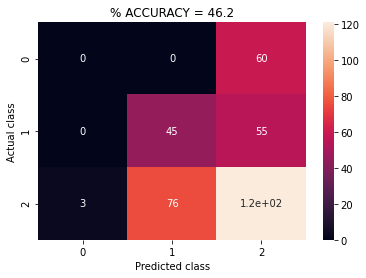

In [29]:

import seaborn as sns
plt.title("% ACCURACY = 46.2" )
# plt.xlabel("Predicted class")
# plt.ylabel("Actual class")

ax = sns.heatmap(cm, annot=True)

ax.set(xlabel="Predicted class", ylabel = "Actual class")


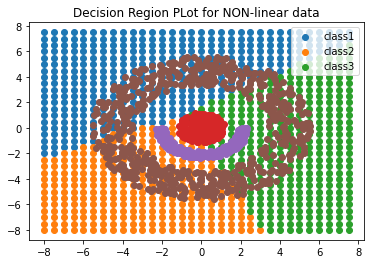

Confusion Matrix
0 20 40
0 59 41
60 50 90
Accuracy: 0.41388888888888886


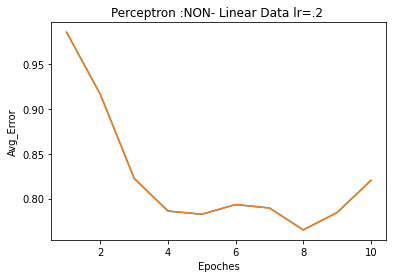

In [25]:

model11 = Perceptron(2,0.1,10)
model11.train(X1, y1)

model22 = Perceptron(2,0.1,10)
model22.train(X2, y2)

model33 = Perceptron(2,0.1,10)
model33.train(X3, y3)


x1grid = np.arange(-8, 8, 0.5)
x2grid = np.arange(-8, 8, 0.5)

# x1grid
cl1 =[]
cl2=[]
cl3=[]

for i in range(len(x1grid)):
  for j in range(len(x2grid)):
    cl = findclass(x1grid[i],x2grid[j])
    if (cl==1):cl1.append([x1grid[i],x2grid[j]])
    if (cl==2):cl2.append([x1grid[i],x2grid[j]])
    if (cl==3):cl3.append([x1grid[i],x2grid[j]]) 




cl1= pd.DataFrame(cl1)
cl2= pd.DataFrame(cl2)
cl3= pd.DataFrame(cl3)
plt.scatter(cl1.iloc[:, 0], cl1.iloc[:, 1],label='class1',alpha=1)
plt.scatter(cl2.iloc[:, 0], cl2.iloc[:, 1],label='class2',alpha=1)
plt.scatter(cl3.iloc[:, 0], cl3.iloc[:, 1],label='class3',alpha=1)
plt.scatter(train1.iloc[:, 0], train1.iloc[:, 1])
plt.scatter(train2.iloc[:, 0], train2.iloc[:, 1])
plt.scatter(train3.iloc[:, 0], train3.iloc[:, 1])
plt.title("Decision Region PLot for NON-linear data")

plt.legend()
plt.show() 


error1 = model11.error
error2 = model22.error
error3= model33.error
epoch = [i for i in range(1,len(error1)+1)]
total_error = [(error1[i]+error2[i]+error3[i])/3 for i in range(len(error1))]
plt.plot(epoch,total_error)
x1grid = np.arange(-5, 25, 0.5)
x2grid = np.arange(-20, 15, 0.5)



error1 = model11.error
error2 = model22.error
error3= model33.error
epoch = [i for i in range(1,len(error1)+1)]
total_error = [(error1[i]+error2[i]+error3[i])/3 for i in range(len(error1))]
plt.plot(epoch,total_error)

plt.xlabel("Epoches")
plt.ylabel("Avg_Error")
plt.title("Perceptron :NON- Linear Data lr=.2 ") 



predict1=[]
predict2=[]
predict3=[]

for i in range(len(test1)):
  c=findclass(test1.iloc[i][0],test1.iloc[i][1])
  predict1.append(c)

for i in range(len(test2)):
  c=findclass(test2.iloc[i][0],test2.iloc[i][1])
  predict2.append(c)

for i in range(len(test3)):
  c=findclass(test3.iloc[i][0],test3.iloc[i][1])
  predict3.append(c)
cm = [[predict1.count(1),predict1.count(2),predict1.count(3)],
      [predict2.count(1),predict2.count(2),predict2.count(3)],
      [predict3.count(1),predict3.count(2),predict3.count(3)]]

print("Confusion Matrix")
for i in range(3):
  print(*cm[i])


inAccuracy = (cm[0][1]+cm[0][2]+cm[1][2]+cm[1][0]+cm[2][0]+cm[2][1])/(cm[0][1]+cm[0][2]+cm[1][2]+cm[1][0]+cm[2][0]+cm[2][1]+cm[0][0]+cm[1][1]+cm[2][2])
print("Accuracy:",1-inAccuracy)













[Text(33.0, 0.5, 'Actual class'), Text(0.5, 15.0, 'Predicted class')]

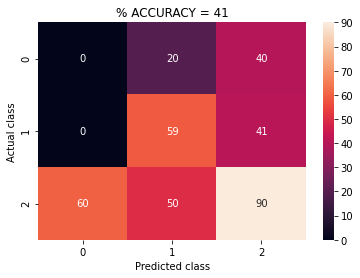

In [27]:

import seaborn as sns
plt.title("% ACCURACY = 41")
# plt.xlabel("Predicted class")
# plt.ylabel("Actual class")

ax = sns.heatmap(cm, annot=True)

ax.set(xlabel="Predicted class", ylabel = "Actual class")
